# Import data
Import data from a file containing the preprocessed dataset.

In [1]:
import pandas as pd
import os

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_csv(r'..\data\preprocessed-data-regression.csv')
elif os.name == 'posix':
    data = pd.read_csv(r'../data/preprocessed-data-regression.csv')

---
# Prepare data
1. Determine the target variable.
2. Determine the features.
3. Split the data into training and test sets.

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=43)

In [3]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Pantothenic acid (B5) \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Cobalamin (B12) \n(ug)', 'Folate, natural \n(ug)', 'Total folates \n(ug)', 'Dietary folate equivalents \n(ug)', 'Vitamin C \n(mg)', 'Cholecalciferol (D3) \n(ug)', '

In [4]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

---
# Linear Regression

In [5]:
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# sample some rows of training set
X_train.sample(10)

,"Energy, without dietary fibre, equated \n(kJ)",Moisture (water) \n(g),Protein \n(g),Nitrogen \n(g),"Fat, total \n(g)",Ash \n(g),Total dietary fibre \n(g),Fructose \n(g),Glucose \n(g),Sucrose\n(g),...,C22:5w3 (mg),C22:4w6 (mg),C22:6w3 (mg),"Total polyunsaturated fatty acids, equated \n(g)","Total long chain omega 3 fatty acids, equated \n(mg)","Total undifferentiated fatty acids, mass basis basis \n(mg)","Total trans fatty acids, imputed \n(mg)",Cholesterol \n(mg),Tryptophan \n(mg/gN),Tryptophan \n(mg)
529,3700,0.0,0.0,0.00,100.0,0.0,0.0,NaN,NaN,NaN,...,0.00,NaN,0.00,9.30,0.000,NaN,1434.00,0,0.0,0
183,1007,38.5,7.8,1.36,2.8,1.8,3.6,0.4,0.0,0.0,...,0.00,0.00,0.00,0.90,0.000,NaN,49.84,0,57.0,77
581,169,85.9,1.4,0.22,0.3,0.5,3.3,3.9,4.2,0.0,...,0.00,NaN,0.00,0.00,0.000,NaN,0.00,0,50.0,11
231,1214,28.4,4.7,0.75,9.4,1.2,2.4,0.1,0.0,31.0,...,0.00,0.00,0.00,0.52,0.000,NaN,35.52,31,46.0,34
799,657,65.6,30.8,4.92,3.6,1.3,0.0,0.0,0.0,0.0,...,51.24,7.94,7.62,0.40,92.468,70.0,111.63,77,NaN,249
262,1371,11.1,10.3,1.76,2.0,1.4,7.8,0.0,0.0,1.0,...,4.32,0.00,0.00,0.82,4.320,NaN,1.44,0,80.0,141
186,1204,26.4,9.8,1.56,4.1,2.1,4.0,9.8,8.3,0.0,...,0.00,0.00,0.00,1.36,0.000,NaN,10.98,0,NaN,100
836,655,65.0,34.4,5.50,1.9,1.3,0.0,0.0,0.0,0.0,...,45.60,4.61,11.43,0.35,103.884,41.0,85.44,85,51.0,278
1046,623,64.8,31.2,4.99,2.5,1.3,0.0,0.0,0.0,0.0,...,11.38,9.10,6.82,0.46,18.200,NaN,13.65,59,73.0,364
747,541,70.2,22.9,3.66,4.1,1.0,0.0,NaN,NaN,NaN,...,16.52,0.00,1.13,0.17,17.651,NaN,127.69,76,51.0,187


In [7]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

X_COLS: ['Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Total sugars (g)', 'Starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Calcium (Ca) \n(mg)', 'Copper (Cu) \n(mg)', 'Iodine (I) \n(ug)', 'Iron (Fe) \n(mg)', 'Magnesium (Mg) \n(mg)', 'Manganese (Mn) \n(mg)', 'Phosphorus (P) \n(mg)', 'Potassium (K) \n(mg)', 'Selenium (Se) \n(ug)', 'Sodium (Na) \n(mg)', 'Zinc (Zn) \n(mg)', 'Thiamin (B1) \n(mg)', 'Riboflavin (B2) \n(mg)', 'Niacin (B3) \n(mg)', 'Niacin derived from tryptophan \n(mg)', 'Niacin derived equivalents \n(mg)', 'Pantothenic acid (B5) \n(mg)', 'Pyridoxine (B6) \n(mg)', 'Cobalamin (B12) \n(ug)', 'Folate, natural \n(ug)', 'Total folates \n(ug)', 'Dietary folate equivalents \n(ug)', 'Vitamin C \n(mg)', 'Cholecalciferol (D3) \n(ug)', '25-hydroxy cholecalciferol (25-OH D3) \n(ug)', 'Vitamin D3 equivalents \n(u

In [8]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

lm.fit(X_train, y_train)

LinearRegression()

In [9]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# compare manually predicted labels with the true labels
print(f"Predictions: {y_pred[:10].round(1)}")
print(f"True labels: {y_test[:10].values}")

Intercept: 97.85688796475154
Coefficients: [-4.64579961e-02 -5.42471255e+00 -7.81006436e-01  3.32943042e-01
 -9.85812857e-01 -1.34993815e-01  6.27961452e-02 -1.36311121e-02
  2.45802974e-01  2.35716983e-01  3.64682327e-03 -1.22635083e+00
 -3.49904591e-03  1.52066286e-01  1.56471525e-03 -9.65620345e-03
 -1.91041390e-02 -5.30689688e-04  1.61170958e-03 -3.04651957e-03
  1.55390840e-03 -3.59316036e-03  7.88026241e-03  3.62039907e-01
  6.55914824e-01  1.32591019e-01 -7.24456998e+00 -3.69314798e-01
  7.04243090e-01  9.54644061e-01 -5.36391986e-02 -3.32126587e-02
  6.95614609e-02 -3.92883902e-02  7.24690393e-03  8.80009899e-02
  4.95932245e-01  5.73916018e-02  8.47745627e-03  2.28323427e-03
 -6.79069471e-02  4.42573298e-02 -9.13731192e-03  3.02250885e-01
  3.92195074e-02 -4.66332058e-02 -3.24240951e-02  2.61803035e-02
  7.13942094e-02 -3.04350983e-01  1.24825408e+00 -3.70907544e-02
  3.24750014e+00 -8.78289978e-02  3.43588991e+00 -1.57467048e-01
 -9.17712476e-01 -4.13295025e-02  5.71223333e-0

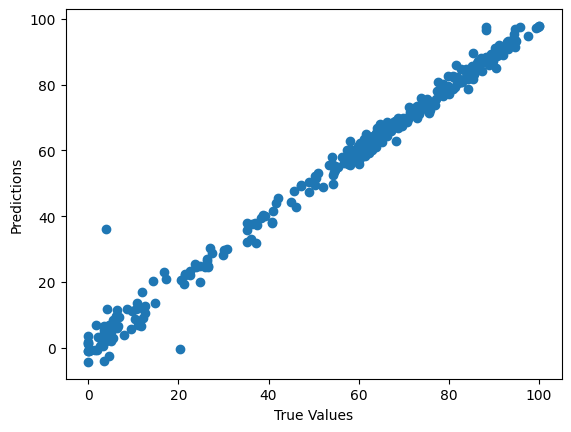

In [10]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

A low MSE value indicates that the model is a good fit for the data. In this case, the MSE is considered low as can be seen from the plot above.